In [3]:
%load_ext autoreload
%autoreload 2

from ml4a.image import *
from ml4a.models import deepdream

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


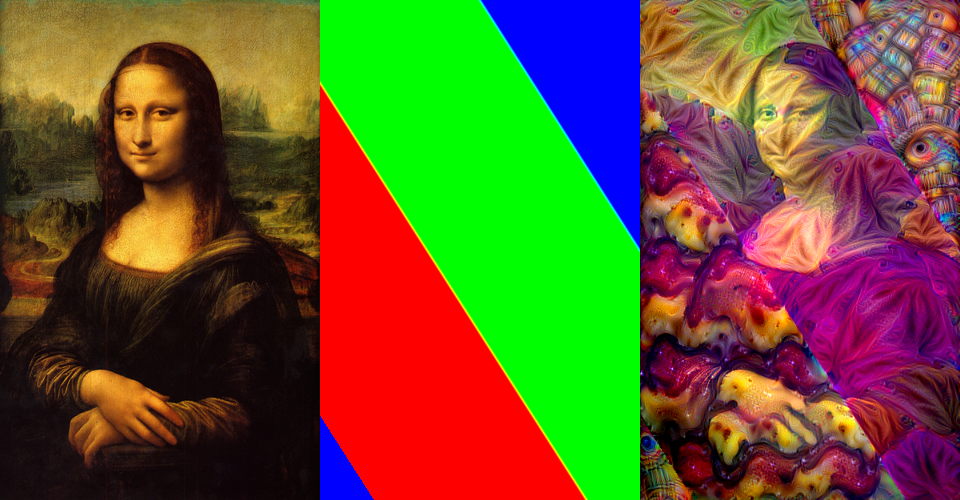

In [6]:
from ml4a.canvas import mask

size = (320, 500)

mask_config = {
    'type': 'rects',
    'size': size, 
    'num_channels':3, 
    'p1': (1.0, 0.0), 
    'p2': (0.0, 1.0), 
    'width': 3.0, 
    'period': 20,
    'blend': 0.01, 
    'reverse': True
}

config = {
    'size': size,
    'masks': mask.get_mask(mask_config, 5),
    'objective': [
        {'layer': 'mixed4c_pool_reduce', 'channel': 26},
        {'layer': 'mixed4d_3x3_bottleneck_pre_relu', 'channel': 7},
        {'layer': 'mixed4c_pool_reduce', 'channel': 6}
    ],
    'num_octaves': 3,
    'octave_ratio': 1.333,
    'num_iterations': 60,
    'lap_n': 20,
    'step': 1.25,
    'grayscale_gradients': False,
    'normalize_gradients': True
}

#img1 = random_image(size)
img1 = load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', size)
img2 = deepdream.run(config, img1)
display(concatenate_images([img1, mask.mask_to_image(mask.get_mask(mask_config, 5)), img2]))
save(img2, 'output2.png')


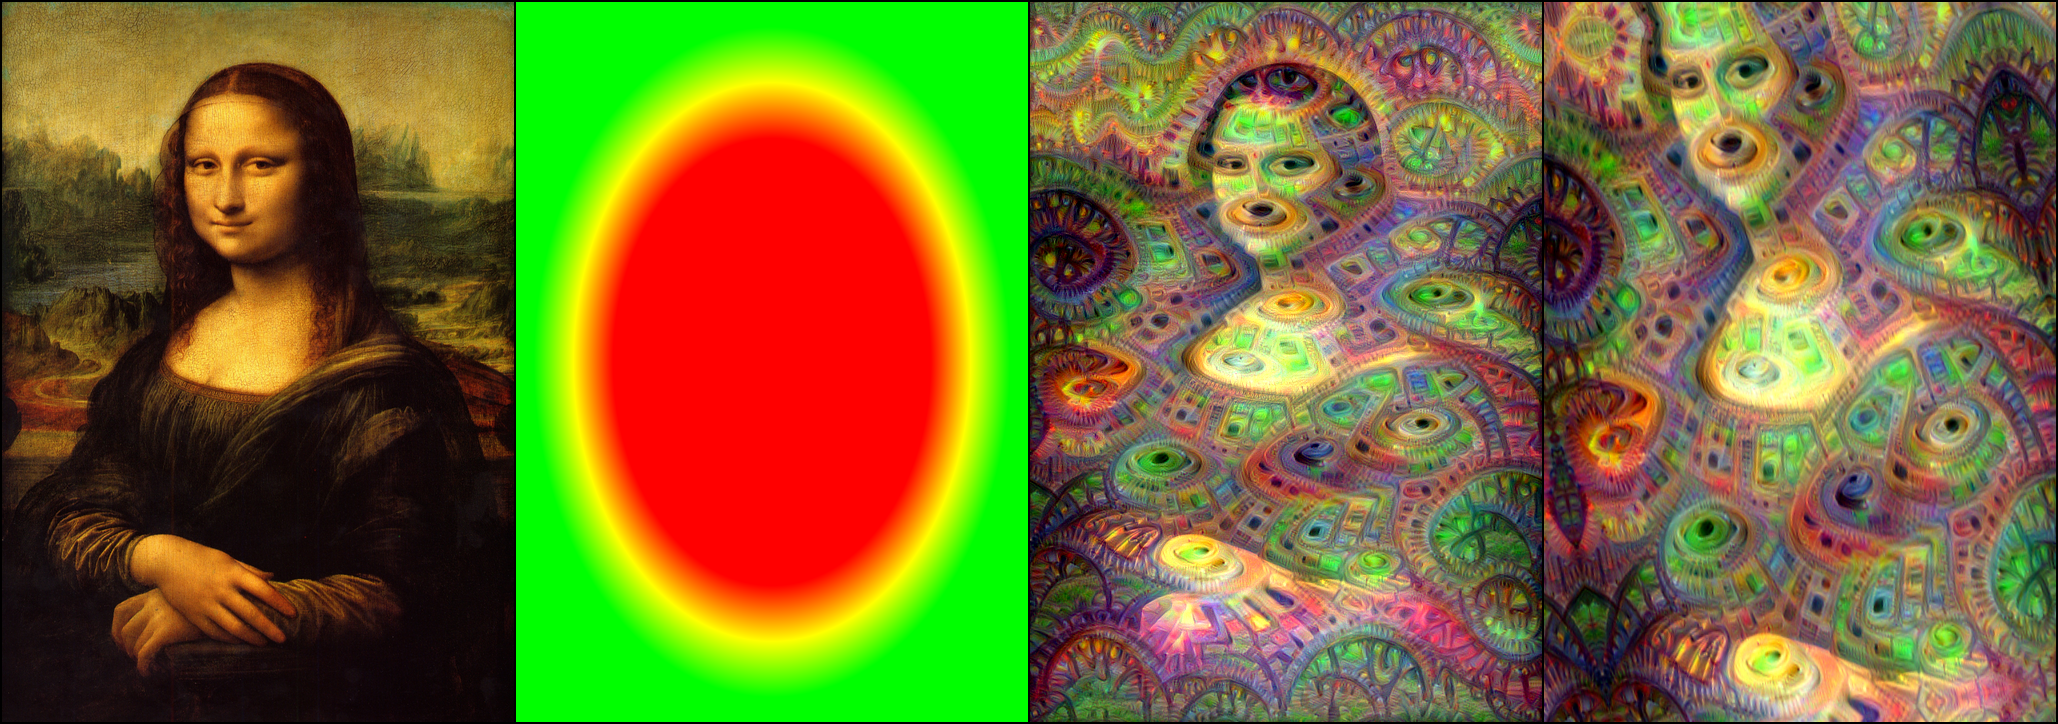

In [9]:
from ml4a.canvas import mask
from ml4a.canvas import canvas

size = (512, 720)

mask_config = {
    'type': 'arcs',
    'size': size, 
    'num_channels': 3, 
    'period': 10,
    'center': (0.5, 0.5), 
    'radius': 0.777, 
    'blend': 0.1, 
    'inwards': True, 
    'reverse': False
}

config = {
    'size': size,
    'masks': mask.get_mask(mask_config, 5),
    'objective': [
        {'layer': 'mixed4c_pool_reduce', 'channel': 9},
        {'layer': 'mixed4d_3x3_bottleneck_pre_relu', 'channel': 2},
        {'layer': 'mixed4c_pool_reduce', 'channel': 3}
    ],
    'num_octaves': 3,
    'octave_ratio': 1.333,
    'num_iterations': 32,
    'lap_n': 24,
    'step': 2.25,
    'normalize_gradients': True
}

#img1 = random_image(size)
img1 = load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', size)
img2 = deepdream.run(config, img1)

canvas_config = {
    'rot_const': 0.2,
    'stretch': (1.5, 1.0)
}

img3 = canvas.modify_canvas(img2, canvas_config)

mask_img = mask.mask_to_image(mask.get_mask(mask_config, 5))

display(concatenate_images([img1, mask_img, img2, img3], margin=2))

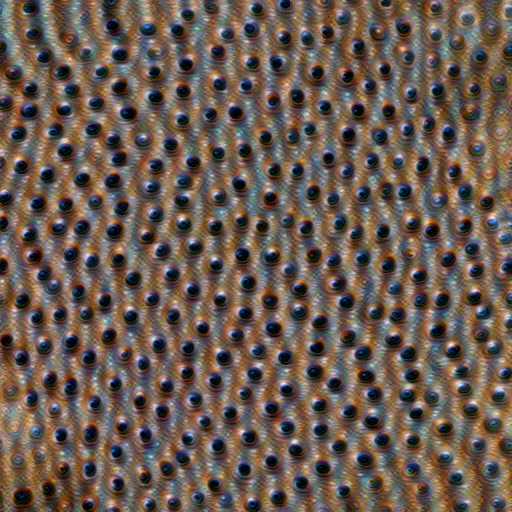

TypeError: generate_video() missing 3 required positional arguments: 'sat', 'con', and 'sharp'

In [11]:
from ml4a.utils import video

num_frames = 50
size = (512, 512)

mask_config = {
    'size': size, 
    'type': 'arcs', 
    'center': (0.5, 0.5), 
    'num_channels': 2,
    'period': 30,
    'radius': 0.70710678118, 'blend': 0.15, 
    'inwards': False, 'reverse': False, 'normalize': False
}

dream_config = {
    'size': size,
    'objective': [
        {'layer': 'mixed3a_3x3_pre_relu', 'channel': 14},
        {'layer': 'mixed3b_pool_reduce_pre_relu', 'channel': 27}
    ],
    'num_octaves': 1,
    'octave_ratio': 1.333,
    'num_iterations': 24,
    'lap_n': 2,
    'step': 1.25,
    'normalize_gradients': True
}

canvas_config = {
    'center': (0.5, 0.5), 
    'shift': (0.0, -0.007), 'stretch': (1.0, 1.0), 
    'zoom': 1.0, 'expand': 0.0, 
    'rot_const': -0.001, 'rot_ang': 0.0, 'rot_dst': 0.0003, 
    'spiral_margin': 0.0, 'spiral_periods': 0.0, 
    'noise_rate': (0, 0), 'noise_margin': (0,0)
}

img = random_image(size, bias=100.0)

masks = [mask.get_mask(mask_config, f) for f in range(num_frames)]
mask.view_mask(masks, flatten_blend=False, draw_rgb=True, animate=True)

for f in range(0, num_frames):
    config['masks'] = mask.get_mask(mask_config, f)
    img = deepdream.run(dream_config, img)
    save_frame(img, f+1, 'frames')
    display(img)
    img = canvas.modify_canvas(img, canvas_config)
    
video.generate_video('frames', 'myExampleMovie.mp4')

In [13]:
display_local('myExampleMovie.mp4')

In [ ]:
# TODO
# basnet example (wilson)

In [24]:
# todo: sequences, deployment

faves = deepdream.get_list_favorites(deepdream.layers_m4)
print(faves[0:3])

channels = deepdream.get_random_favorites(deepdream.layers_c1, 3)
print(channels)

[{'layer': 'D1', 'channel': 36}, {'layer': 'D1', 'channel': 63}, {'layer': 'D1', 'channel': 46}]
[{'layer': 'A3', 'channel': 28}, {'layer': 'A1', 'channel': 7}, {'layer': 'A1', 'channel': 52}]


In [16]:
## doesn't work yet... implement sequences

output = {'name':'interps', 'save_all':True, 'save_last':True, 'num_loop_frames':0}
attributes = {'h':720, 'w':1280, 'iter_n':10, 'step':1.0, 'oct_n':3, 'oct_s':1.7197235, 'lap_n':16, 'matchHist':True, 'brightMult':1.0}

canvas = {'shift':(0.0, 0.00), 'stretch':(1.0, 1.0), 
          'center':(0.5, 0.5), 'zoom':1.0, 'expand':0.0, 'rot_const':0.00, 'rot_ang':0.0, 'rot_dst':0.0, 
          'spiral_margin':0.0, 'spiral_periods':0.0, 
          'noise_rate':(0,0), 'noise_margin':(0,0)}

mask = {'type':'interpolation', 'n':len(channels), 'period':10, 'ctr_y':0.5, 'ctr_x':0.5, 'blend':0.9, 'cross_fade':True, 'reverse':False, 'normalize':True}

sequence = Sequence(attributes)
sequence.append(channels, mask, canvas, 5*10, 0)
sequence.loop_to_beginning(output['num_loop_frames'])

# push_to_queue

#sequence.add_injection("media/faceapp.png", 0, 30, 0.5)


#view_mask(sequence, attributes, output, draw_rgb=False)
#view_canvas(canvas, attributes['h'], attributes['w'], 30)
img = generate(sequence, attributes, output, start_from=0, preview=False)
#showarray(img/255.)


#sequence, attributes, output = load_config("/home/gene/lapnorm/results_old/test_8/F2-41+C2-0+C3-179+B2-44+C1-106_n11_o02_r1.39/_data.json")


AttributeError: 'DeepDream' object has no attribute 'get_random_favorites'

In [ ]:
# MASKS
#mask = {'type':'arcs', 'h':h, 'w':w, 'n':nc, 'period':nf, 'ctr_y':0.5, 'ctr_x':0.5, 'radius':0.70710678118, 'blend':0.1, 'inwards':False, 'reverse':False, 'crop':Crop.CIRCLE_SHIFT}
#mask = {'type':'image', 'n':len(ch), 'thresholds':[25,80,140,256], 'blur_k':5, 'n_dilations':3, 'blend':0.0, 'crop':0, 'path':'media/monalisa.jpg', 'normalize':True}
#mask = {'type':'rects', 'period':5, 'p1':(0.5,0.0), 'p2':(0.5,1.0), 'width':2.0, 'n':len(ch), 'blend':0.31, 'reverse':False, 'crop':Crop.NONE}
#mask = {'type':'rects', 'period':1e8, 'p1':(0.5001,0.0), 'p2':(0.5,1.0), 'width':2.0, 'n':len(ch), 'blend':0.3, 'reverse':False, 'crop':Crop.NONE}
#mask = {'type':'movie', 'h':h, 'w':w, 'n':3, 'thresholds':[50,100,238], 'blur_k':8, 'n_dilations':10, 'blend':0.1, 'crop':Crop.NONE, 'path':'/home/gene/projects/lapnorm/belgrade', 'idx1':0, 'idx2':175}
#mask = {'type':'interpolation', 'n':len(ch), 'period':5, 'ctr_y':0.5, 'ctr_x':0.5, 'blend':0.25, 'cross_fade':True, 'reverse':False, 'crop':Crop.CIRCLE_NOSHIFT}

config1 = 'results/arcs4/0001/config.json'
config2 = 'results/arcs4/0004/config.json'

merge(config1, config2, 20)


In [ ]:
import sys
sys.path.append('..')

from neuralarttools.mask import *
from neuralarttools.canvas import *
from neuralarttools.video import *
from neuralarttools.util import *

from model import *
from dream import *

params = DeepDreamArgs()
params.tile_size = 512
params.model_file = 'model/tensorflow_inception_graph.pb'

deepdream = DeepDream(params)





from bookmarks import *


for idx_movie in range(1,4):


    num_frames = 5
    size = (1280, 720)
    size=(320, 180)


    channels = get_random_favorites(faves_m3 + faves_m4, 1)
    obj = [{'layer': layer_lookup[c['layer']], 'channel': c['channel']} for c in channels]

    obj0 = {'layer': 'mixed4d_3x3_bottleneck_pre_relu', 'channel': 139}

    optimization = {
        'size': size,
        'objective': obj,
        'num_octaves': 3,
        'octave_ratio': 1.44,
        'num_iterations': 40,
        'lap_n': 5,
        'step': 1.333,
        'normalize_gradients': True
    }

    mask = {
        'type': 'movie',
        'path': '../neural-art-tools/examples/myFrames%02d'%idx_movie,
        'size': size, 
        'num_channels': 2, 
        'blend': 0.25, 
        'blur_k': 5, 
        'n_dilations': 2
    }

    canvas = {
        'center': (0.5, 0.5), 
        'shift': (0.0, 0.0), 'stretch': (1.0, 1.0), 
        'zoom': 1.0, 'expand': 0.0, 
        'rot_const': 0.0, 'rot_ang': 0.0, 'rot_dst': 0.0, 
        'spiral_margin': 0.0, 'spiral_periods': 0.0, 
        'noise_rate': (0.7, -0.66), 'noise_margin': (1.4, -1.5)
    }

    #img = random_image((64, 64), bias=100.0)

    #masks = [get_mask(mask, size, f) for f in range(100)]
    #view_mask(masks, flatten_blend=False, draw_rgb=True, animate=True)
    img = None

    for f in range(0, num_frames):

        #mask0 = get_mask(mask, f)
    #     mask0 = load_image('../../neural-art-tools/examples/frames2/frame%05d.png'%(f+1), size)
    #     mask0 = np.array(mask0).astype(np.float32)/255.


        mask_img = load_image('../neural-art-tools/examples/frames2/frame%05d.png'%(f+1), size)
        mask_img = np.mean(np.array(mask_img).astype(np.float32)/255., axis=2)

        mask0 = np.zeros((size[1], size[0], 2)).astype(np.float64)
        mask0[:,:,0] = 1.0-mask_img
        mask0[:,:,1] = mask_img


        img0 = load_image('../neural-art-tools/examples/frames/frame%05d.png'%(f+1), size)
        if img is None:
            img = random_image(size, bias=100.0)

        img_in = img0 * mask0[:,:,1].reshape((size[1], size[0], 1))
        img_in += img * mask0[:,:,0].reshape((size[1], size[0], 1))

        #display(img_in)
    #     print("THE INPUT")
    #     time.sleep(5)


        optimization['masks'] = mask0[:,:,0].reshape((size[1], size[0], 1))
    #    optimization['masks'][:,:,1] = 0.0


        img = run_deepdream(deepdream, optimization, img_in)
        save_frame(img, f+1, 'myFrames%02d'%idx_movie)
        #display(img)
        img = modify_canvas(img, canvas)

    # saturation, contrast, sharpness = 1.2, 1.15, 1.5
    generate_video('frames5', 'wilson%02d.mp4'%idx_movie, 
                   sat=1.0, con=1.0, sharp=1.0, 
                   match_hist=False, erase_frames=False)

